In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

file_path = 'SanPhamMeVaBe.csv'
data = pd.read_csv(file_path)

# rename columns
data_cleaned = data.rename(columns={'Product Name': 'ProductName', 'Product Price': 'ProductPrice', 'Catergory': 'Category'})

# split data (80% train, 20% test)
X = data_cleaned[['ProductName', 'ProductPrice']]
y = data_cleaned['Category']

X_train, X_test, y_train, y_test = train_test_split(X['ProductName'], y, test_size=0.2, random_state=42)

# create pipeline
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))

# train model
model.fit(X_train, y_train)

# test model
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

Bé chơi và học       0.94      0.95      0.94       238
       Bé khỏe       0.97      0.86      0.91        35
        Bé mặc       0.96      0.99      0.98       727
        Bé ngủ       1.00      0.90      0.94        86
   Bé ra ngoài       0.85      1.00      0.92        69
       Bé uống       0.96      0.99      0.98       254
    Bé vệ sinh       0.93      0.95      0.94       196
     Bé ăn dặm       0.98      0.91      0.94       248
     Đồ cho mẹ       0.91      0.74      0.81        65
  Đồ trong nhà       0.84      0.78      0.81        54

      accuracy                           0.95      1972
     macro avg       0.93      0.91      0.92      1972
  weighted avg       0.95      0.95      0.95      1972



In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
file_path = 'SanPhamMeVaBe.csv'
data = pd.read_csv(file_path)

In [3]:
# rename columns
data_cleaned = data.rename(columns={'Product Name': 'ProductName', 'Product Price': 'ProductPrice', 'Catergory': 'Category'})

In [4]:
# split data (80% train, 20% test)
X = data_cleaned['ProductName'].astype(str)
y = data_cleaned['Category']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [5]:
# tokenization and padding
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=50, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=50, padding='post')

In [16]:
# create model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(50000, 64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 50, 64)         │     3,200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,224,202 (12.30 MB)

 Trainable params: 3,224,202 (12.30 MB)

 Non-trainable params: 0 (0.00 B)

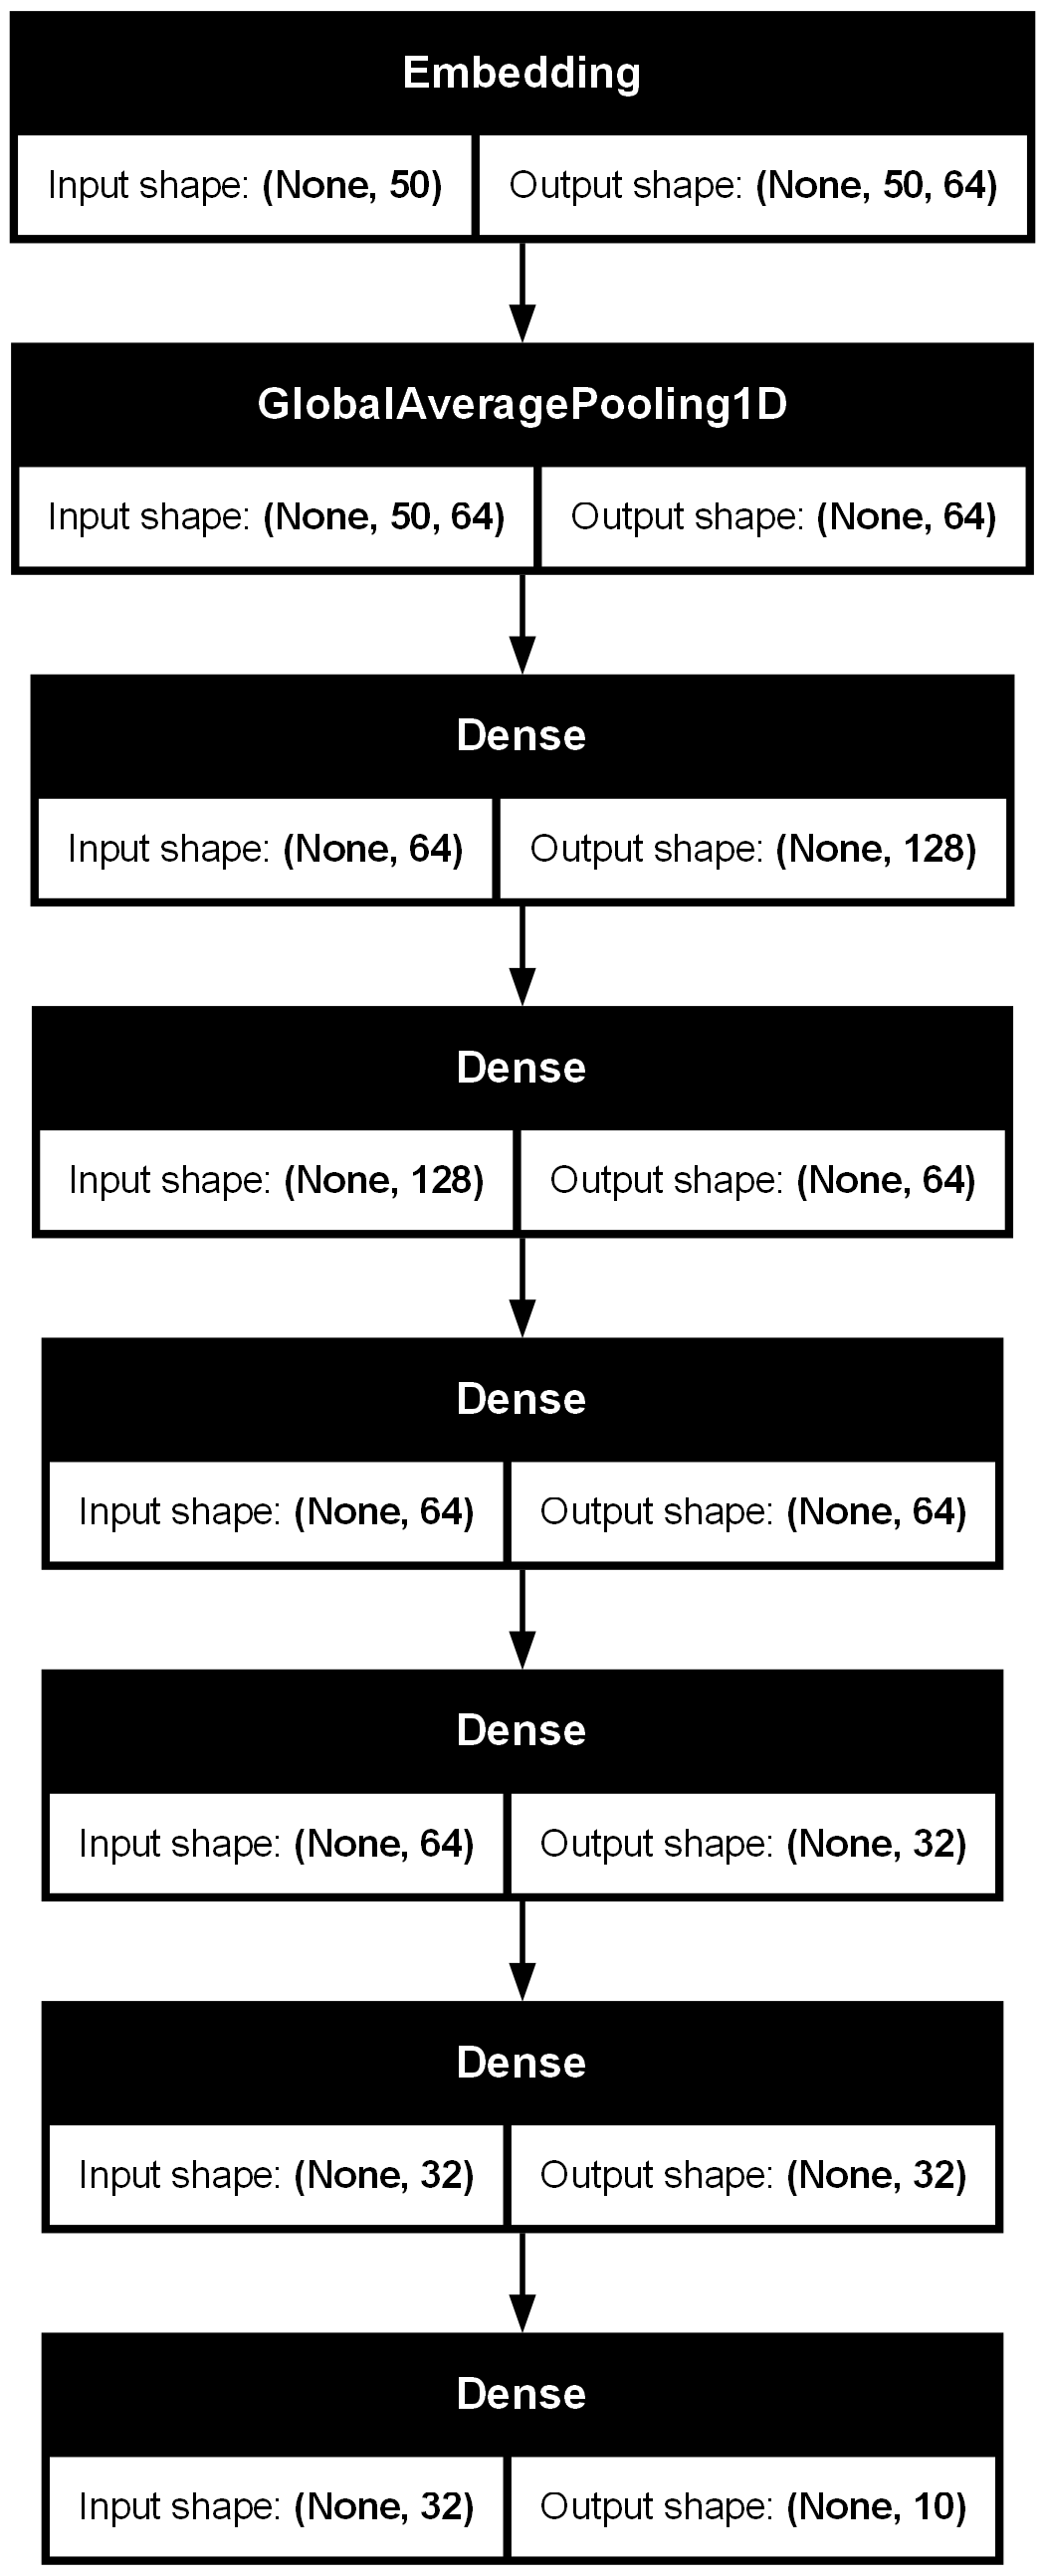

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [18]:
# complie model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model.fit(X_train_padded, y_train, epochs=50, validation_data=(X_test_padded, y_test))

Epoch 1/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.3845 - loss: 1.9644 - val_accuracy: 0.5101 - val_loss: 1.4002
Epoch 2/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5837 - loss: 1.2498 - val_accuracy: 0.6623 - val_loss: 1.0038
Epoch 3/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6672 - loss: 0.9905 - val_accuracy: 0.7049 - val_loss: 0.9013
Epoch 4/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7339 - loss: 0.8005 - val_accuracy: 0.6826 - val_loss: 0.8822
Epoch 5/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7588 - loss: 0.6721 - val_accuracy: 0.7875 - val_loss: 0.6200
Epoch 6/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8141 - loss: 0.5365 - val_accuracy: 0.7809 - val_loss: 0.6391
Epoch 7/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8430 - loss: 0.4523 - val_accuracy: 0.8489 - val_loss: 0.4483
Epoch 8/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8917 - loss: 0.3315 - val_acc

In [19]:

# evaluate
loss, accuracy = model.evaluate(X_test_padded, y_test)

print(f"Test Accuracy: {accuracy:.4f}")

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9370 - loss: 0.4462
Test Accuracy: 0.9417
